In [25]:
import pickle
import os

import pandas as pd
import shap

from common import preprocess_df

RESULTS_DIR = "C:/Users/User/PYTHON PROJECTS/SSS_A2/xai-pipeline/RESULTS_CTU-13"
SHAP_RESULTS = "Scenario 1/SHAP/shapley_explanations.pk"
PREDICTIONS = "Scenario 1/SHAP/pred_vs_true.csv"

PREDICTIONS_HEADER = ["Index", "y_pred", "y_true", "correct_predicted"]

In [26]:
shap_values = pickle.load(open(os.path.join(RESULTS_DIR, SHAP_RESULTS), "rb"))
len(shap_values)

1525

In [27]:
pred_df = pd.read_csv(os.path.join(RESULTS_DIR, PREDICTIONS), index_col=False, header=None, names=PREDICTIONS_HEADER)
pred_df = preprocess_df(pred_df)
pred_df

,y_pred,y_true,correct_predicted
0,1,1,True
1,1,1,True
2,1,1,True
3,0,0,True
4,1,0,False
...,...,...,...
1520,0,0,True
1521,1,1,True
1522,0,0,True
1523,1,0,False


In [28]:
# Determine the accuracy of the explainable set 
accuracy = pred_df["correct_predicted"].mean()

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


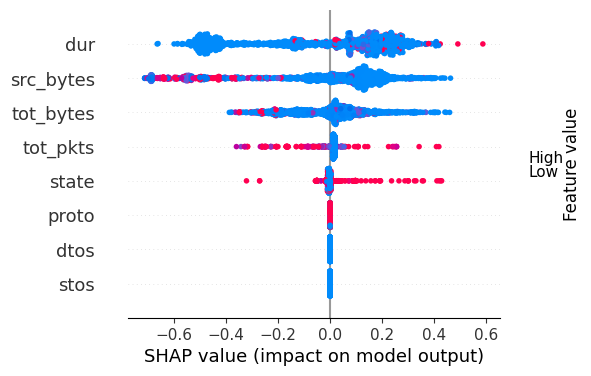

In [29]:
shap.summary_plot(shap_values, show=True, plot_size=(6,4))

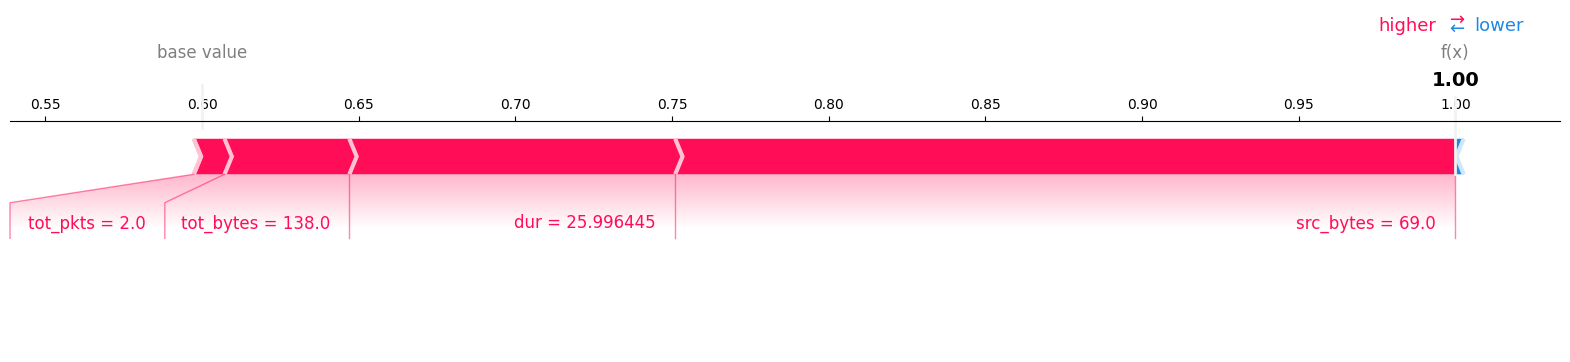

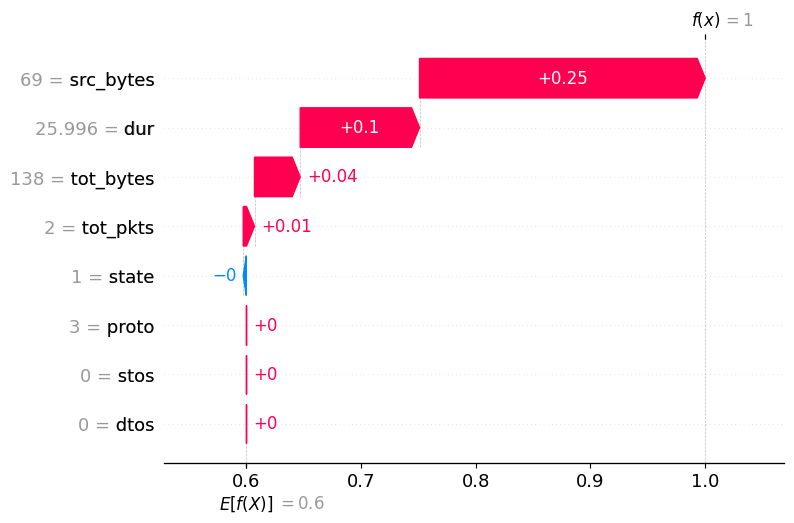

In [32]:
# print(shap_values[0])
# print(type(shap_values[0]))

shap.plots.force(shap_values[0], matplotlib=True, show=True)
shap.plots.waterfall(shap_values[0], show=True)
